<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/NLP_01(binary_classification%2C_undersampler%2C_bilstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/tensorflow_dataset/Quora Insincere Questions Classification.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
train_df = pd.read_csv('Quora Insincere Questions Classification/train.csv')
test_df = pd.read_csv('Quora Insincere Questions Classification/test.csv')
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
train_df.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [5]:
X = train_df['question_text'].to_list()
y = train_df['target'].to_list()

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)


(array([979943.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  64954.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

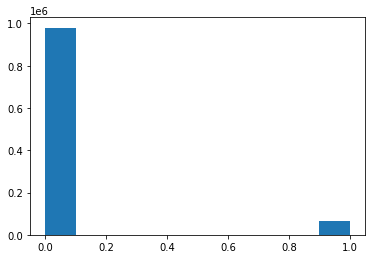

In [7]:
plt.hist(y_train)

(array([64954.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 64954.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

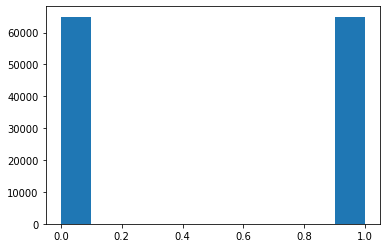

In [13]:
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(pd.DataFrame(X_train, columns=['question_text']),
                                          np.array(y_train).reshape(-1, 1))

plt.hist(y_balanced)

In [14]:
train_df_balanced = pd.concat([X_balanced, pd.DataFrame(y_balanced, columns=['target'])], axis=1)

In [15]:
train_df_balanced

,question_text,target
0,Why am I unable to downvote some answers on Qu...,0
1,Why did you follow me on Quora exactly?,0
2,Will a borderline personality follow the ideal...,0
3,What is the best way to score good marks in CB...,0
4,How do I know what is the right temperature fo...,0
...,...,...
129903,Is the average IQ of Indians very low? (I dont...,1
129904,Why are so many Chinese trolls attacking India...,1
129905,Why is there so little hatred for Muslims comp...,1
129906,Why don't Indian actresses do respectful roles...,1


33


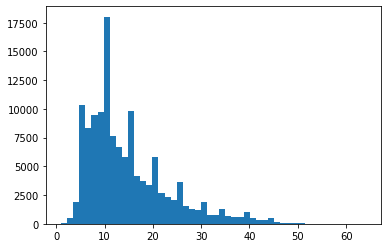

In [16]:
sentences_length = [len(sentences.split()) for sentences in train_df_balanced['question_text'].to_list()]
plt.hist(sentences_length, bins=50)
output_sen_len = int(np.percentile(sentences_length, 95))
print(output_sen_len)

In [17]:
max_tokens = 68000
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                           output_sequence_length=output_sen_len)
text_vectorizer.adapt(X_balanced)

In [18]:
text_vectorizer.get_vocabulary()[:5], text_vectorizer.get_vocabulary()[-5:]

(['', '[UNK]', 'the', 'to', 'is'],
 ['0001',
  '0000001',
  '0000000001',
  '0000000000001',
  '000000000000000000000000000'])

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_balanced, y_balanced))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [20]:
for text, label in train_dataset.take(1):
  print(text)
  print(text_vectorizer(text))

tf.Tensor([b'Why am I unable to downvote some answers on Quora?'], shape=(1,), dtype=string)
tf.Tensor(
[[   6  107   13 1694    3 6413   55  394   27   73    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]], shape=(1, 33), dtype=int64)


In [21]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:
vocab_size = len(text_vectorizer.get_vocabulary())
embedding_dims = 128
cnn_filters = 64
kernel_size = 5
output_dims = 1
LSTM_units = 64

In [23]:
# model = tf.keras.Sequential([
#   tf.keras.Input(shape=(1,), dtype='string'),
#   text_vectorizer,
#   layers.Embedding(input_dim=vocab_size,
#                    output_dim=embedding_dims),
#   layers.Conv1D(filters=cnn_filters,
#                 kernel_size=kernel_size,
#                 padding='same',
#                 activation='relu'),
#   layers.GlobalAveragePooling1D(),
#   layers.Dense(units=output_dims, activation='sigmoid')
# ])

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 33)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 33, 128)           8499072   
                                                                 
 conv1d (Conv1D)             (None, 33, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,540,161
Trainable params: 8,540,161
Non-

In [30]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1,), dtype='string'),
  text_vectorizer,
  layers.Embedding(input_dim=vocab_size,
                   output_dim=embedding_dims),
  layers.Bidirectional(layers.LSTM(units=LSTM_units,
                                   activation='tanh',
                                   return_sequences=True)),
  layers.GlobalAveragePooling1D(),
  layers.Dense(units=output_dims, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 33)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 33, 128)           8499072   
                                                                 
 bidirectional (Bidirectiona  (None, 33, 128)          98816     
 l)                                                              
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                      

In [31]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [32]:
history = model.fit(train_dataset,
                    epochs=3,
                    steps_per_epoch=int(0.1*len(train_dataset)),
                    validation_data=test_dataset,
                    validation_steps=int(0.1*len(test_dataset)))

Epoch 1/3
406/406 [==============================] - 77s 175ms/step - loss: 0.0155 - accuracy: 0.9999 - val_loss: 0.6850 - val_accuracy: 0.9377
Epoch 2/3
406/406 [==============================] - 71s 176ms/step - loss: 1.0205e-05 - accuracy: 1.0000 - val_loss: 0.7286 - val_accuracy: 0.9377
Epoch 3/3
406/406 [==============================] - 68s 166ms/step - loss: 5.7274e-06 - accuracy: 1.0000 - val_loss: 0.7580 - val_accuracy: 0.9377


In [33]:
model.evaluate(test_dataset)

8164/8164 [==============================] - 118s 14ms/step - loss: 0.7385 - accuracy: 0.9393


[0.738511860370636, 0.9393013715744019]